In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
installs = pd.read_csv('/home/fede/Desktop/Datos/TPPandas/installs.csv.gzip', compression = 'gzip')

In [4]:
installs.loc[:,'created'] = pd.to_datetime(installs['created'], errors = 'coerce')
del installs['click_hash']
del installs['attributed']
del installs['trans_id']

In [5]:
installs.head()

,created,application_id,ref_type,ref_hash,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,685400811232710215,3.301378e+18


In [7]:
installs.count()

created               3412
application_id        3412
ref_type              3412
ref_hash              3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
session_user_agent    3364
user_agent            1729
event_uuid             865
kind                   865
wifi                  1729
ip_address            3412
device_language       3378
dtype: int64

In [90]:
installs['user_agent'].value_counts().count()


334

In [9]:
implicit = installs[installs['implicit'] == True]

In [148]:
implicit['kind'].replace('open', 'Open', inplace = True)
implicit['kind'].replace(['EVENT_HOMEPAGE', 'EVENT_Homepage'], 'Event Homepage', inplace = True)

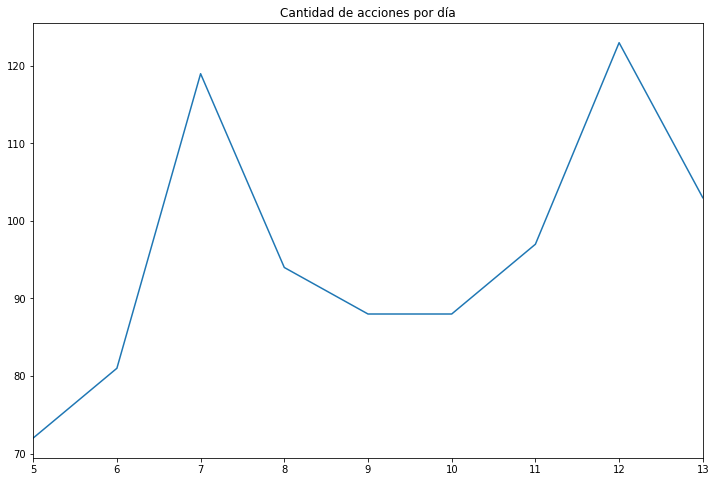

In [76]:
#Gráfico de cantidad de acciones por día
dates = implicit['created'].dt.day
p = dates.value_counts()
p.sort_index().plot(figsize = (12,8), title = 'Cantidad de acciones por día')
plt.show()

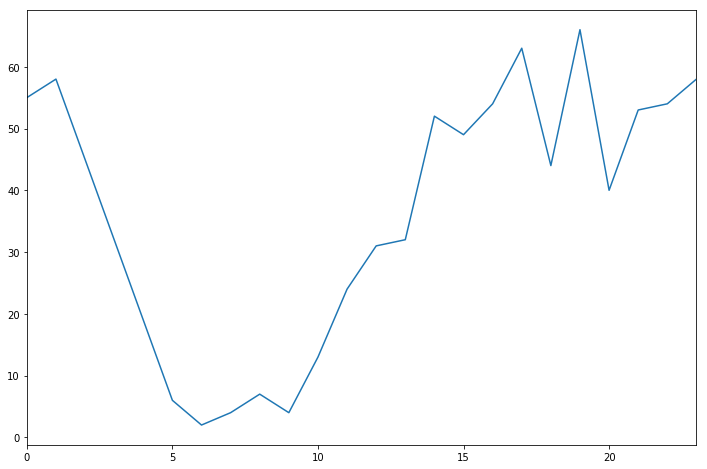

In [19]:
#Gráfico de acciones por hora del día.
times = implicit['created'].dt.hour
q = times.value_counts()
q.sort_index().plot(figsize = (12,8))
plt.show()

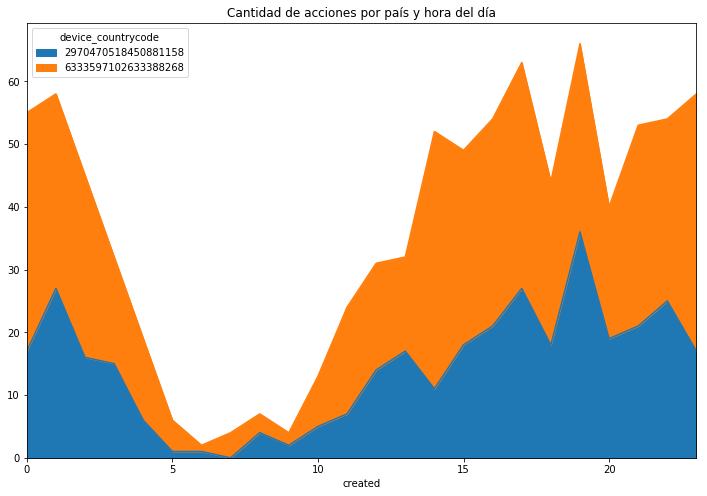

In [54]:
paises = implicit[['created', 'device_countrycode']].groupby(implicit['created'].dt.hour).agg({'device_countrycode' : 'value_counts'})
paises['device_countrycode'].unstack().plot.area(figsize = (12,8), title = 'Cantidad de acciones por país y hora del día')
plt.show()

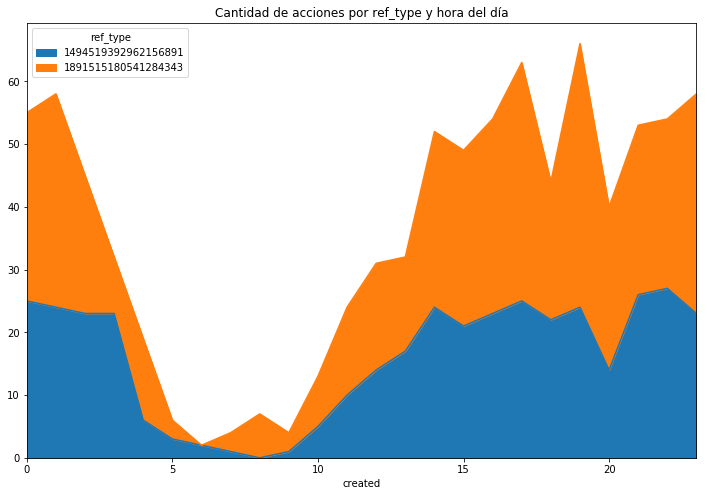

In [73]:
paises = implicit[['created', 'ref_type']].groupby(implicit['created'].dt.hour).agg({'ref_type' : 'value_counts'})
paises['ref_type'].unstack().plot.area(figsize = (12,8), title = 'Cantidad de acciones por ref_type y hora del día')
plt.show()

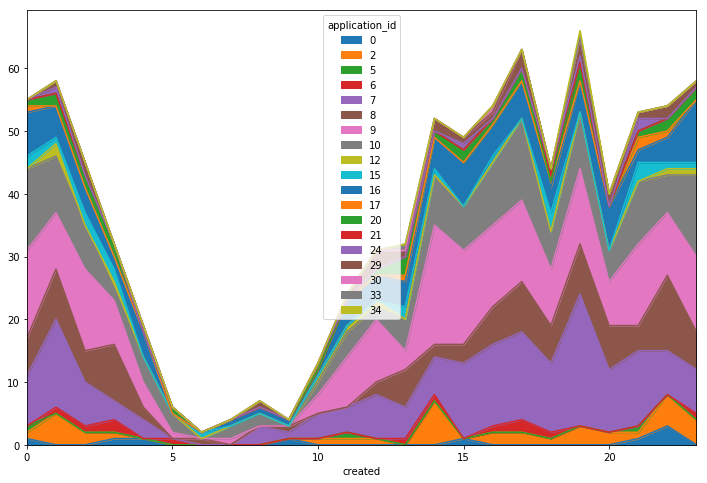

In [84]:
#Gráfico de cantidad de acciones por hora del día y por aplicación.
app = implicit[['created','application_id']].groupby([implicit['created'].dt.hour]).agg({'application_id' : 'value_counts'})
app['application_id'].unstack().plot.area(figsize = (12, 8))
plt.show()

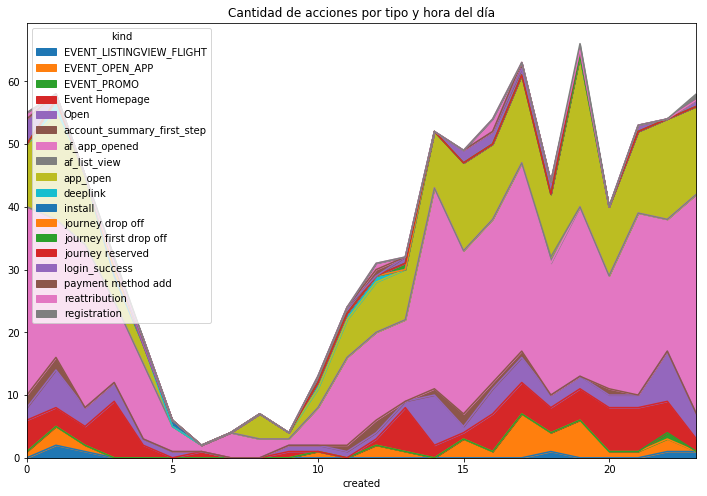

In [149]:
tipos = implicit[['created', 'kind']].groupby(implicit['created'].dt.hour).agg({'kind' : 'value_counts'})
tipos['kind'].unstack().plot.area(figsize = (12,8), title = 'Cantidad de acciones por tipo y hora del día')
plt.show()

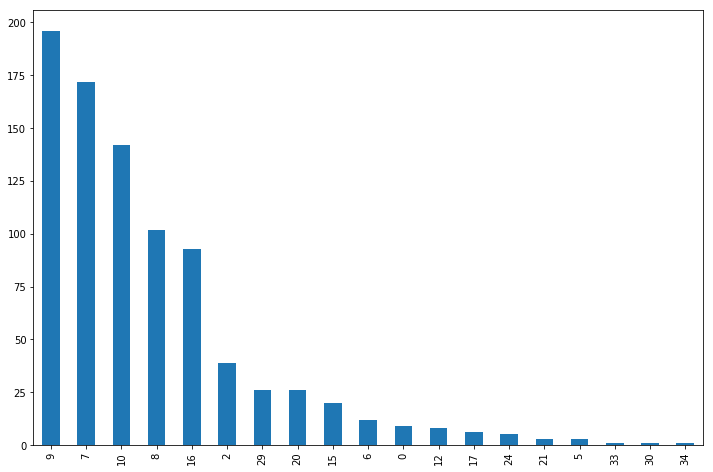

In [20]:
#Gráfico de cantidad de acciones por aplicación
apps = implicit['application_id']
r = apps.value_counts()
r.plot(kind = 'bar', figsize = (12,8))
plt.show()

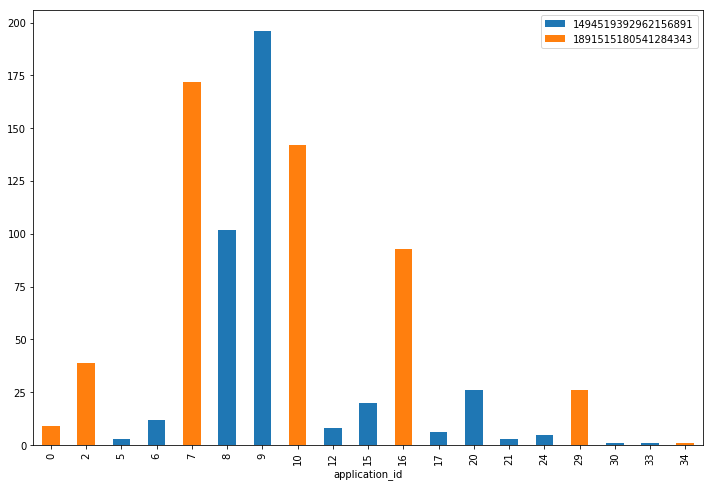

In [72]:
app = implicit[['ref_type','application_id']].groupby('application_id').agg({'ref_type' : 'value_counts'})
app['ref_type'].unstack().plot(kind = 'bar', stacked = True, figsize = (12, 8)).legend(loc = 'best')
plt.show()

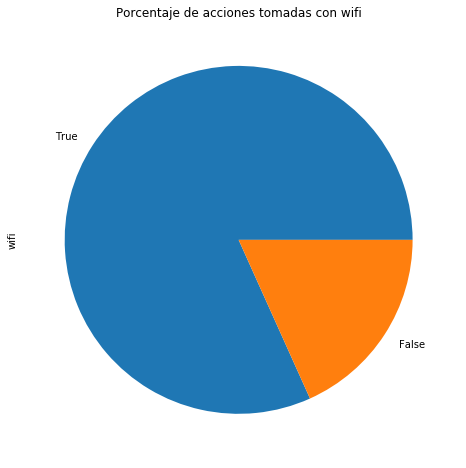

In [145]:
implicit['wifi'].value_counts(normalize = True).plot(kind = 'pie', figsize = (12,8), title = 'Porcentaje de acciones tomadas con wifi')
plt.show()

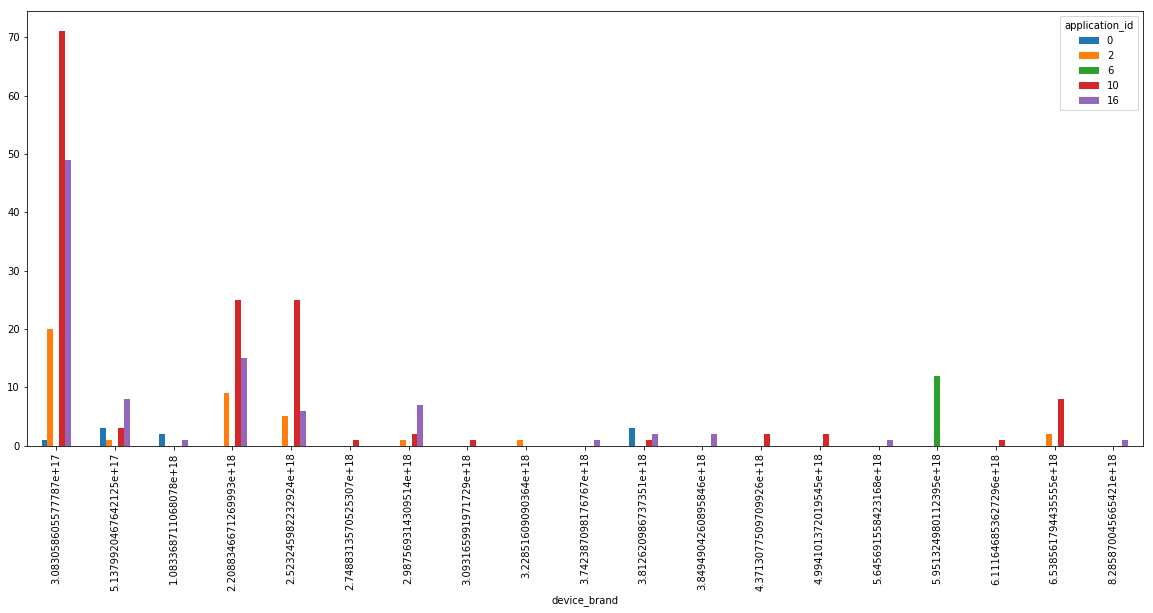

In [30]:
#Gráfico de cantidad de por marca y por aplicación
brands = implicit[['application_id', 'device_brand']].groupby('device_brand').agg({'application_id' : 'value_counts'})
brands['application_id'].unstack().plot(kind = 'bar', figsize = (20,8))
plt.show()

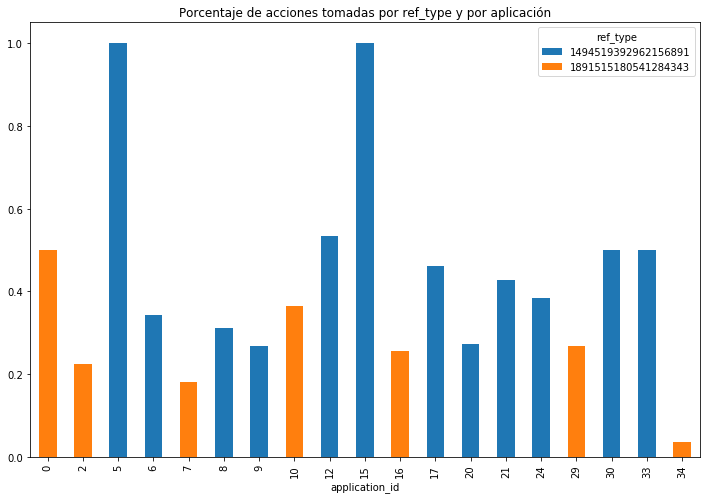

In [144]:
models = installs[['application_id', 'ref_type', 'implicit']].groupby(['application_id','ref_type']).agg({'implicit' : 'mean'})
positive = models[models['implicit'] != 0]
positive['implicit'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,8), title = 'Porcentaje de acciones tomadas por ref_type y por aplicación')
plt.show()

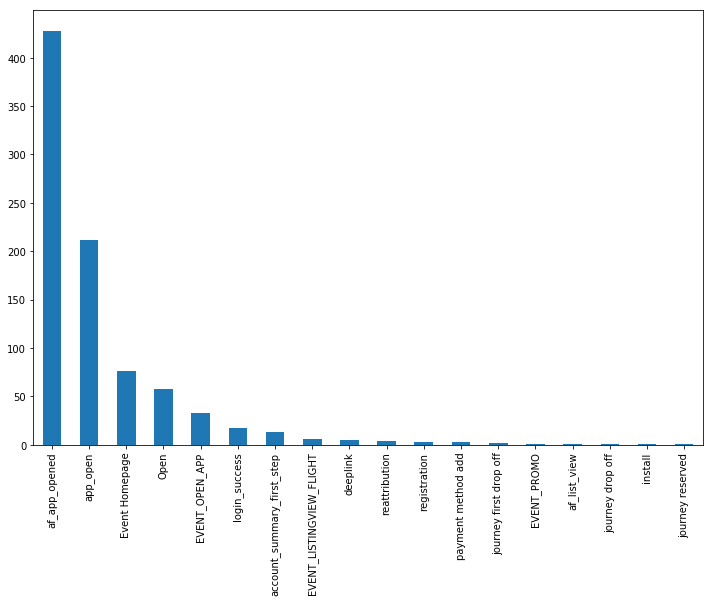

In [35]:
#Gráfico de tipos de acciones
implicit['kind'].value_counts().plot(kind = 'bar', figsize = (12,8))
plt.show()

In [36]:
installs['kind'].count()

865

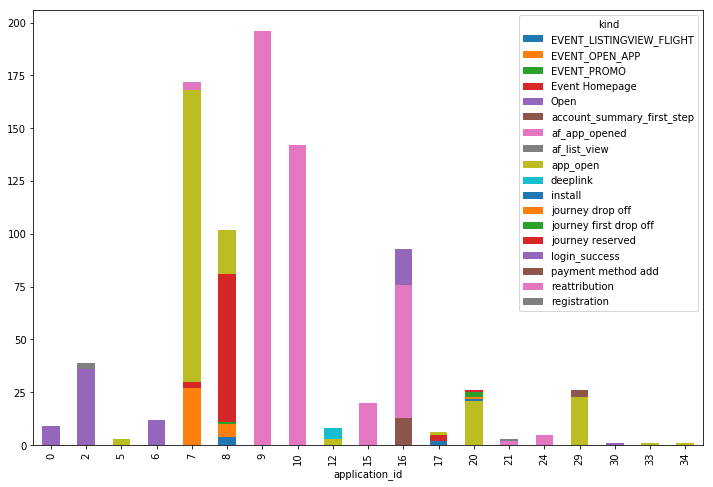

In [37]:
#Gráfico de cantidad acciones de por tipo y por aplicación
brands = implicit[['application_id', 'kind']].groupby('application_id').agg({'kind' : 'value_counts'})
brands['kind'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.show()

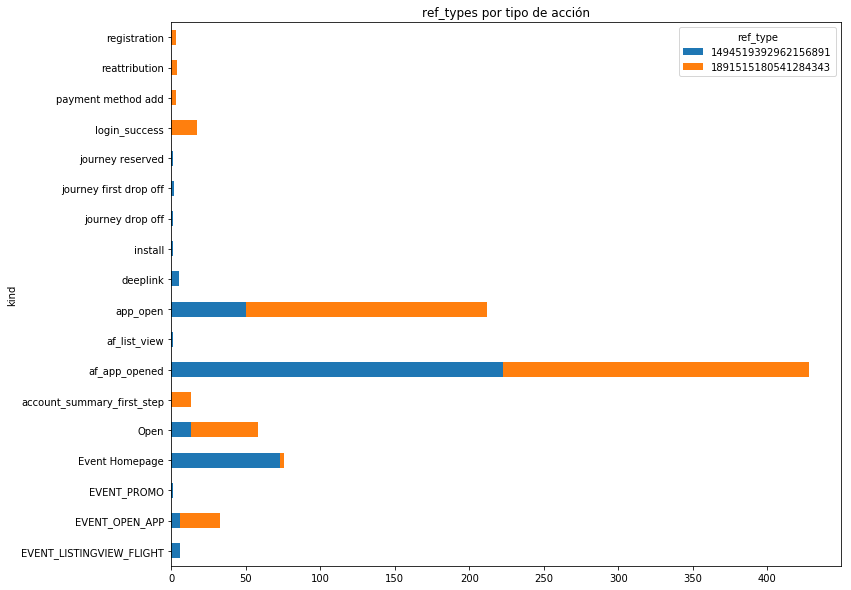

In [122]:
types = implicit[['ref_type', 'kind']].groupby('kind').agg({'ref_type' : 'value_counts'})
types['ref_type'].unstack().plot(title = 'ref_types por tipo de acción', kind = 'barh', stacked = True, figsize = (12,10))
plt.show()

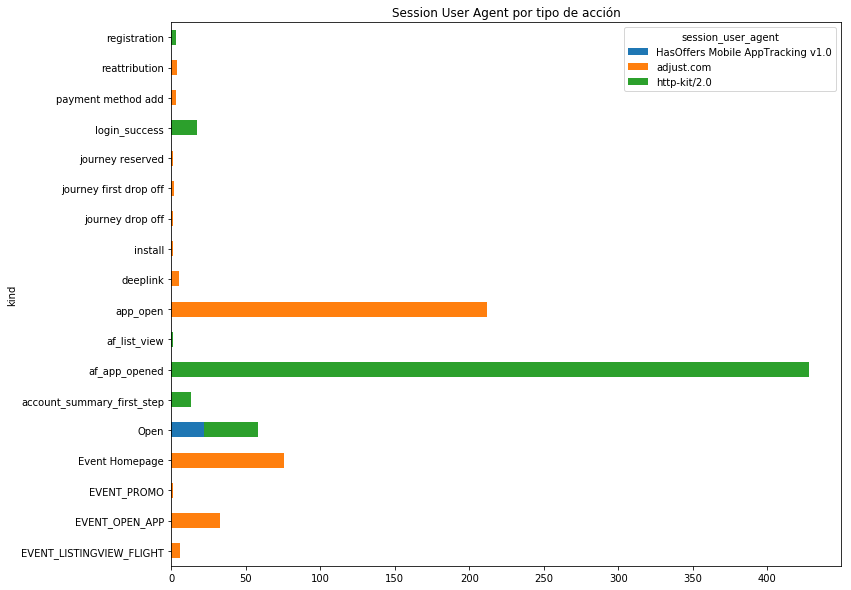

In [131]:
kinds = implicit[['session_user_agent', 'kind']].groupby('kind').agg({'session_user_agent' : 'value_counts'})
kinds['session_user_agent'].unstack().plot(title = 'Session User Agent por tipo de acción', kind = 'barh', stacked = True, figsize = (12,10))
plt.show()

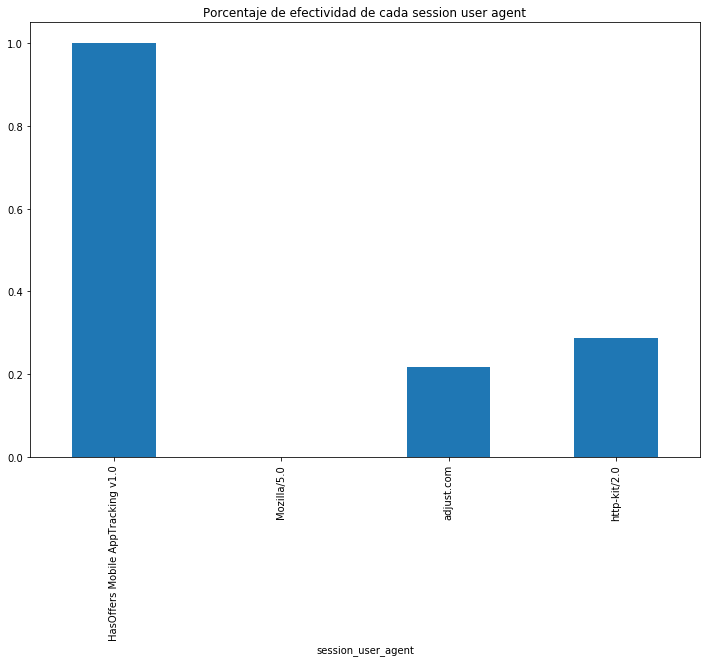

In [40]:
replaced = installs.replace(['Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/72.0.3626.101 Mobile/15E148 Safari/605.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) GSA/68.0.234683655 Mobile/15E148 Safari/605.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/16C101 [FBAN/FBIOS;FBAV/208.0.0.48.103;FBBV/141927594;FBDV/iPhone9,3;FBMD/iPhone;FBSN/iOS;FBSV/12.1.2;FBSS/2;FBCR/O2;FBID/phone;FBLC/en_GB;FBOP/5;FBRV/143280066]',
                                                  'Mozilla/5.0 (iPad; CPU OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
                                                    'Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 like Mac OS X) AppleWebKit/604.5.6 (KHTML, like Gecko) Version/11.0 Mobile/15D100 Safari/604.1',
                                                   'Mozilla/5.0 (iPhone; CPU iPhone OS 11_4_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.0 Mobile/15E148 Safari/604.1',
                                                   'Mozilla/5.0 (Linux; Android 6.0; ALE-L23) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.105 Mobile Safari/537.36'], 'Mozilla/5.0')
sess = replaced[['session_user_agent', 'implicit']].groupby('session_user_agent').agg({'implicit':'mean'})
sess['implicit'].plot(title = 'Porcentaje de efectividad de cada session user agent', kind = 'bar', figsize = (12,8))
plt.show()

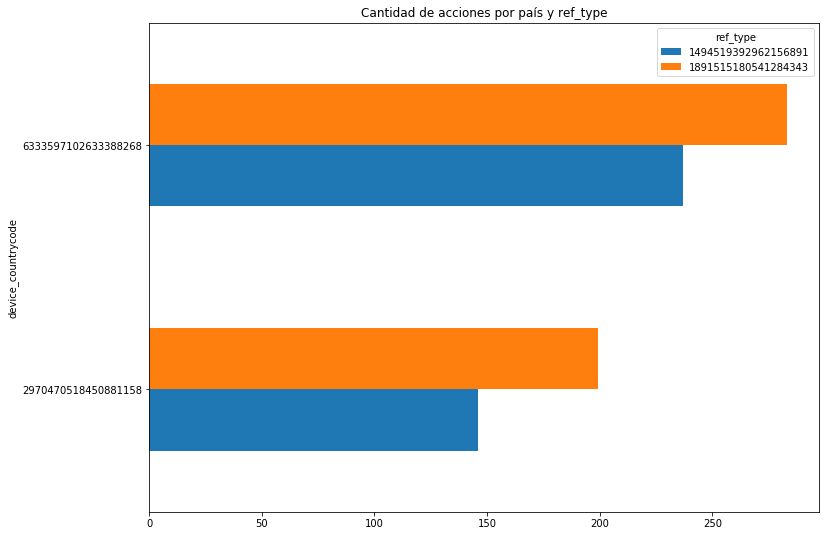

In [130]:
paises = implicit[['device_countrycode', 'ref_type']].groupby('device_countrycode').agg({'ref_type' : 'value_counts'})
paises['ref_type'].unstack().plot(kind = 'barh', figsize = (12,9), title = 'Cantidad de acciones por país y ref_type')
plt.show()

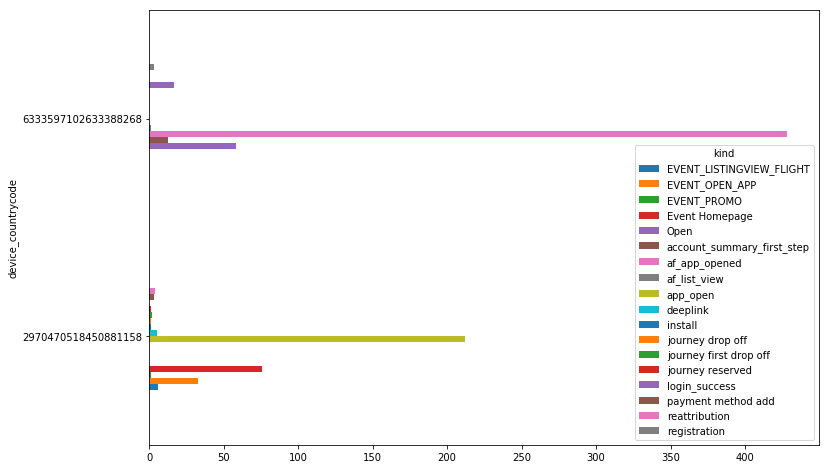

In [118]:
des_paises = implicit[['device_countrycode', 'kind']].groupby('device_countrycode').agg({'kind' : 'value_counts'})
des_paises['kind'].unstack().plot(kind = 'barh', figsize = (12,8))
plt.show()

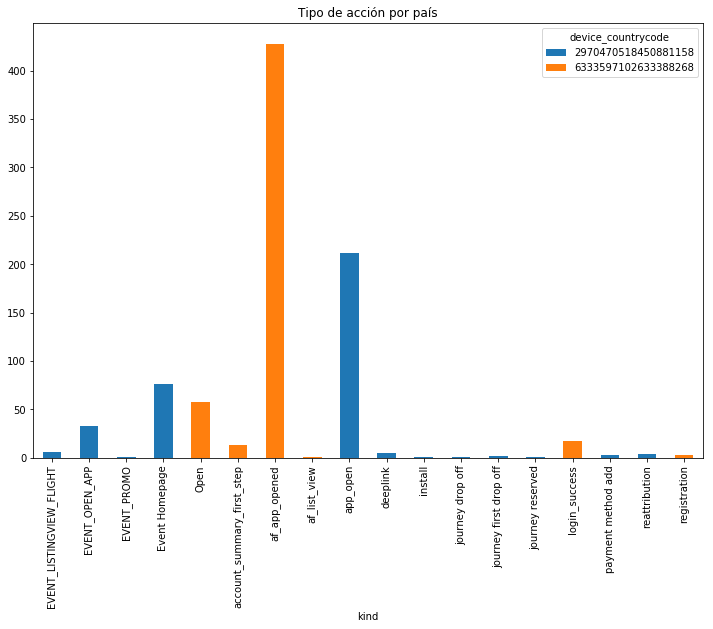

In [101]:
kinds = implicit[['kind', 'device_countrycode']].groupby('kind').agg({'device_countrycode' : 'value_counts'})
kinds['device_countrycode'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,8), title = 'Tipo de acción por país')
plt.show()

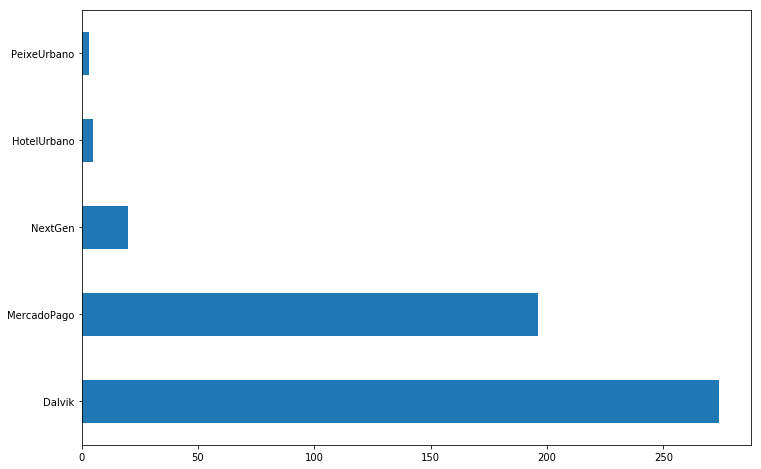

In [120]:
user_agents = implicit['user_agent'].dropna()
agents = user_agents.apply(lambda x : (x.split('/'))[0]).value_counts()
agents.plot(kind = 'barh', figsize = (12,8))
plt.show()

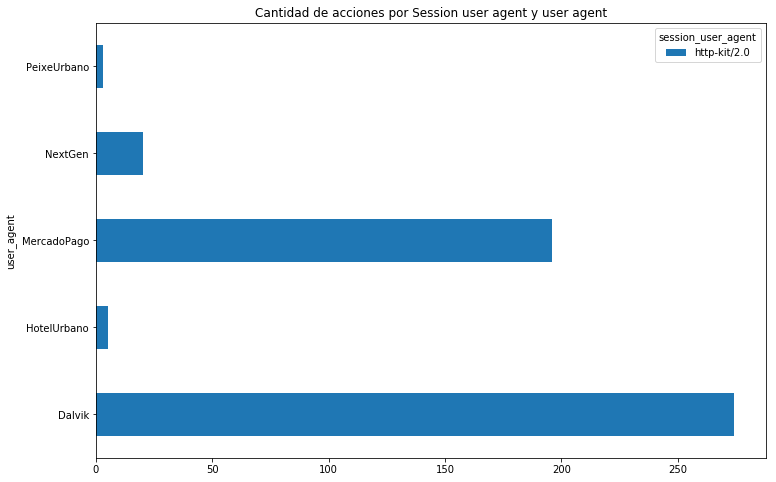

In [123]:
uys = implicit[['user_agent', 'session_user_agent', 'ref_type']].dropna()
uys.loc[:,'user_agent'] = uys['user_agent'].apply(lambda x : (x.split('/'))[0])
session_users = uys[['user_agent', 'session_user_agent']].groupby('user_agent').agg({'session_user_agent' : 'value_counts'})
session_users['session_user_agent'].unstack().plot(kind = 'barh', figsize = (12,8), title = 'Cantidad de acciones por Session user agent y user agent')
plt.show()

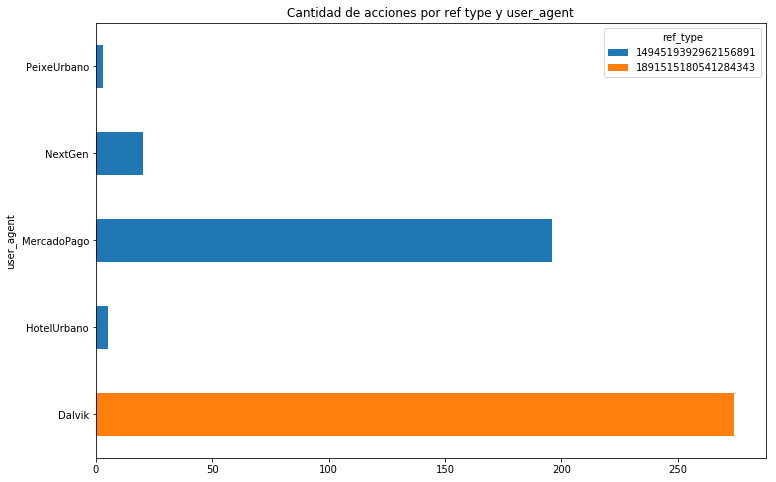

In [105]:
ref_types = session_users = uys[['user_agent', 'ref_type']].groupby('user_agent').agg({'ref_type' : 'value_counts'})
ref_types['ref_type'].unstack().plot(kind = 'barh', stacked = True, figsize = (12,8), title = 'Cantidad de acciones por ref type y user_agent')
plt.show()

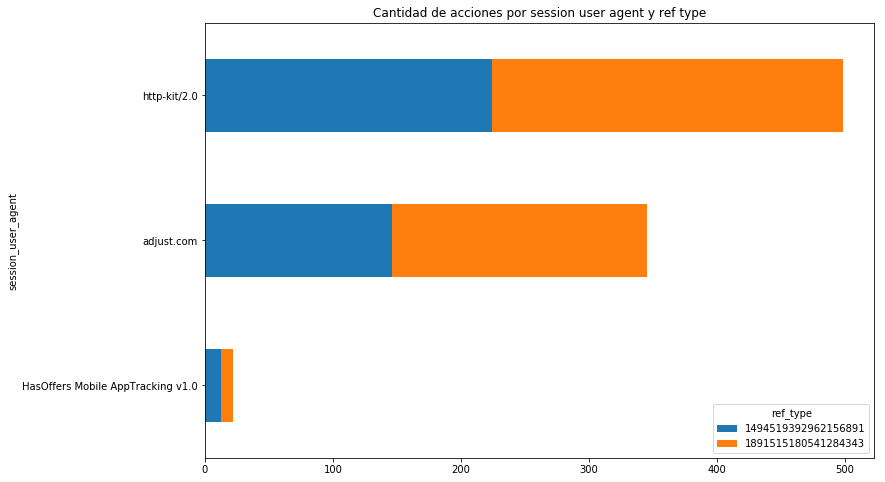

In [124]:
refs = implicit[['ref_type', 'session_user_agent']].groupby('session_user_agent').agg({'ref_type' : 'value_counts'})
refs['ref_type'].unstack().plot(kind = 'barh', stacked = True, figsize = (12,8), title = 'Cantidad de acciones por session user agent y ref type')
plt.show()

In [147]:
installs['wifi'].value_counts().sum()

1729